Анализ исторических котировок акций

In [3]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

-Загрузка и изменение формы данных о котировках акций, предоставляемых веб-сервисом Yahoo!Finance

In [4]:
# импортируем пакет pandas_datareader
import pandas_datareader as pdr
# считываем данные яхо по акциям конкретной компании за конкретный период, ticker - это торговый код акции, start u end - стартовая и конечные даты
def get_stock_data(ticker, start, end):
    # считываем данные
    data = pdr.data.DataReader(ticker, 'yahoo', start, end)
    # переименовываем этот столбец
    data.insert(0,'Ticker', ticker)
    return data

In [5]:
# запрашиваем данные для торгового кода MSFT за трехлетний период
start = datetime(2012,1,1)
end = datetime(2014,12,31)
get_stock_data('MSFT',start,end)[:5]

           Ticker       High        Low       Open  \
Date                                                 
2012-01-03   MSFT  26.959999  26.389999  26.549999   
2012-01-04   MSFT  27.469999  26.780001  26.820000   
2012-01-05   MSFT  27.730000  27.290001  27.379999   
2012-01-06   MSFT  28.190001  27.530001  27.530001   
2012-01-09   MSFT  28.100000  27.719999  28.049999   

                Close      Volume  Adj Close  
Date                                          
2012-01-03  26.770000  64731500.0  22.020796  
2012-01-04  27.400000  80516100.0  22.539021  
2012-01-05  27.680000  56081400.0  22.769344  
2012-01-06  28.110001  99455500.0  23.123066  
2012-01-09  27.740000  59706800.0  22.818701  

In [6]:
# загружаем данные по нескольким торговым кодам акций: задаем список торговых кодов start u end - это стартовая и конечные даты
def get_data_for_multiple_stocks(tickers,start,end):
    # мы возвращаем словарь 
    stocks = dict()
    # итерируем по всем торговым кодам акций 
    for ticker in tickers:
        # загружаем данные по конкретному торговому коду
        s = get_stock_data(ticker,start, end)
        # добавляем их в словарь
        stocks[ticker] = s
    # возвращаем словарь
    return stocks

In [7]:
# загружаем данные по всем интересующим нас акциям
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "DAL", "UAL", "PEP", "KO"],
    start, end)

In [8]:
# выведем данные по торговому коду MSFT
raw['MSFT'][:5]


           Ticker       High        Low       Open  \
Date                                                 
2012-01-03   MSFT  26.959999  26.389999  26.549999   
2012-01-04   MSFT  27.469999  26.780001  26.820000   
2012-01-05   MSFT  27.730000  27.290001  27.379999   
2012-01-06   MSFT  28.190001  27.530001  27.530001   
2012-01-09   MSFT  28.100000  27.719999  28.049999   

                Close      Volume  Adj Close  
Date                                          
2012-01-03  26.770000  64731500.0  22.020796  
2012-01-04  27.400000  80516100.0  22.539021  
2012-01-05  27.680000  56081400.0  22.769344  
2012-01-06  28.110001  99455500.0  23.123066  
2012-01-09  27.740000  59706800.0  22.818701  

In [9]:
# Поворачиваем данные, превращая значения столбца Ticker в названия столбцов, соответствующие торговоым кодам акций
def pivot_tickers_to_columns(raw, column):
    items = []
    # итерируем по всем ключам словаря
    for key in raw:
        # получаем данные по ключу
        data = raw[key]
        # извлекаем заданный столбец
        subset = data[['Ticker', column]]
        # добавляем к элементам
        items.append(subset)
        
    # конкатенируем все элементы
    combined = pd.concat(items)
    # сбрасываем индекс
    ri = combined.reset_index()
    # возвращаем данные, совершив поворот
    return ri.pivot('Date','Ticker',column)


In [10]:
# выполняем поворот
close_px = pivot_tickers_to_columns(raw,'Close')
# смотрим результат
close_px[:5]

Ticker           AAPL   DAL         GE  ...       MSFT  \
Date                                    ...              
2012-01-03  58.747143  8.04  17.653847  ...  26.770000   
2012-01-04  59.062859  8.01  17.846153  ...  27.400000   
2012-01-05  59.718571  8.33  17.836538  ...  27.680000   
2012-01-06  60.342857  8.32  17.932692  ...  28.110001   
2012-01-09  60.247143  8.28  18.134615  ...  27.740000   

Ticker            PEP        UAL  
Date                              
2012-01-03  66.400002  18.900000  
2012-01-04  66.739998  18.520000  
2012-01-05  66.220001  18.389999  
2012-01-06  65.389999  18.209999  
2012-01-09  65.730003  17.930000  

[5 rows x 8 columns]

-Визуализация временных рядов котировок акций

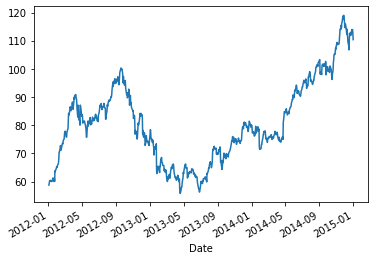

In [11]:
# визуализируем цены закрытия для AAPL 
close_px['AAPL'].plot()

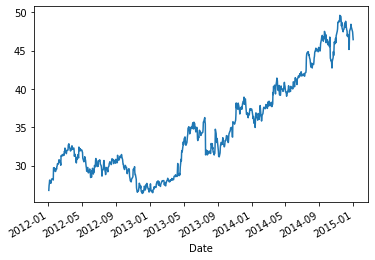

In [12]:
close_px['MSFT'].plot()

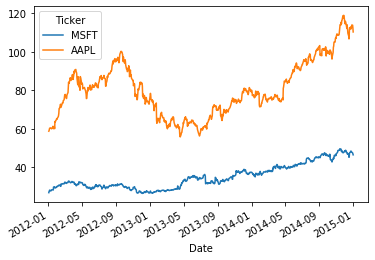

In [13]:
# визуализация цены закрытия для MSFT u AAPL на одном и том же графике
close_px[['MSFT','AAPL']].plot()

-Визуализация временных рядов объемов торгов 

In [14]:
# совершаем поворот, превратив данные об объемах торгов в столбцы
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker            AAPL        DAL          GE  ...  \
Date                                           ...   
2014-12-24  14479600.0  4296200.0  18579700.0  ...   
2014-12-26  33721000.0  5303100.0  15577600.0  ...   
2014-12-29  27598900.0  6656700.0  21692500.0  ...   
2014-12-30  29881500.0  7318900.0  23071800.0  ...   
2014-12-31  41403400.0  7772200.0  29334700.0  ...   

Ticker            MSFT        PEP        UAL  
Date                                          
2014-12-24  11437800.0  1604100.0  2714300.0  
2014-12-26  13197800.0  1492700.0  3062200.0  
2014-12-29  14439500.0  2453800.0  2874300.0  
2014-12-30  16384700.0  2134400.0  2644600.0  
2014-12-31  21552500.0  3727400.0  4440500.0  

[5 rows x 8 columns]

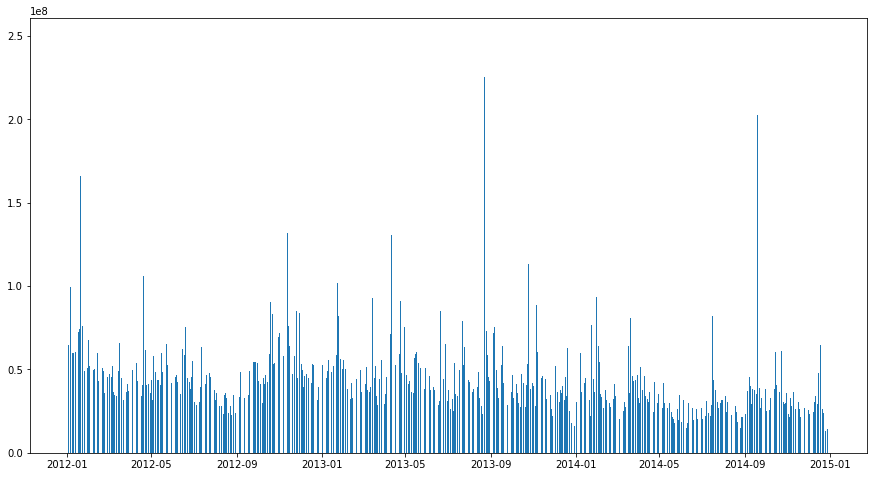

In [15]:
# визуализируем данные об объеме торгов для MSFT
msft_volume = volumes[['MSFT']]
plt.bar(msft_volume.index, msft_volume['MSFT'])
plt.gcf().set_size_inches(15,8)

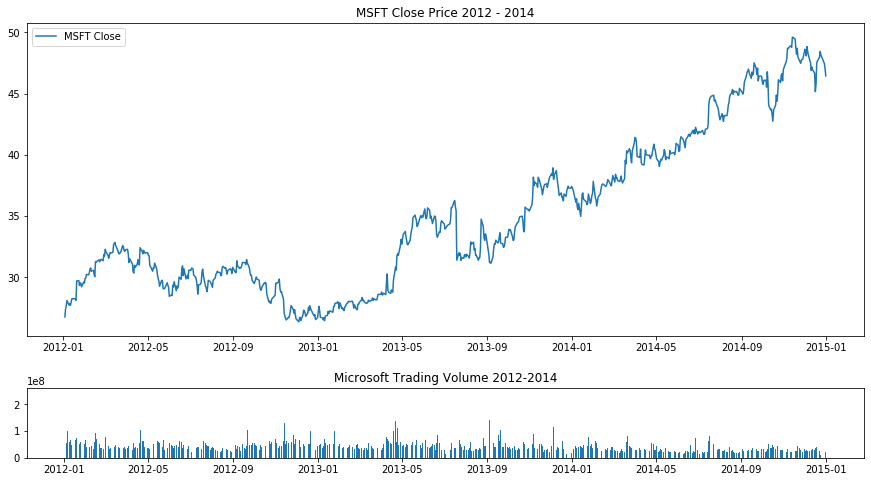

In [16]:
# в верхней части размещаем график цены закрытия
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'],
         label='MSFT Close')
plt.title('MSFT Close Price 2012 - 2014')
plt.legend(loc=2)

# в нижней части размещаем график объема торгов
bottom = plt.subplot2grid((4,4),(3,0), rowspan=1,colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2012-2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

-Вычисление простого ежедневного процентного изменения цены закрытия.

In [17]:
# вычисляем ежедневное процентное изменение 
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker          AAPL       DAL        GE  ...      MSFT  \
Date                                      ...             
2012-01-03       NaN       NaN       NaN  ...       NaN   
2012-01-04  0.005374 -0.003731  0.010893  ...  0.023534   
2012-01-05  0.011102  0.039950 -0.000539  ...  0.010219   
2012-01-06  0.010454 -0.001201  0.005391  ...  0.015535   
2012-01-09 -0.001586 -0.004808  0.011260  ... -0.013163   

Ticker           PEP       UAL  
Date                            
2012-01-03       NaN       NaN  
2012-01-04  0.005120 -0.020106  
2012-01-05 -0.007791 -0.007019  
2012-01-06 -0.012534 -0.009788  
2012-01-09  0.005200 -0.015376  

[5 rows x 8 columns]

In [18]:
# вычислим вручную процентное изменение цены закрытия для AAPL за 2012-01-05
close_px.loc['2012-01-05']['AAPL'] / \
    close_px.loc['2012-01-04']['AAPL'] -1

0.011101936875951512

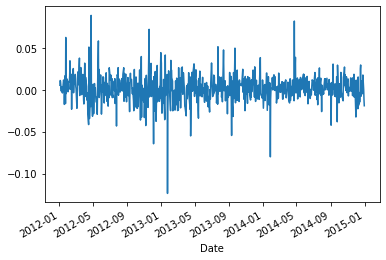

In [19]:
daily_pc['AAPL'].plot()

-Вычисление простой ежедневной накопленной доходности акций

In [20]:
# вычисляем ежедневную накопленную доходность
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker          AAPL       DAL        GE  ...      MSFT  \
Date                                      ...             
2012-01-03       NaN       NaN       NaN  ...       NaN   
2012-01-04  1.005374  0.996269  1.010893  ...  1.023534   
2012-01-05  1.016536  1.036070  1.010349  ...  1.033993   
2012-01-06  1.027162  1.034826  1.015795  ...  1.050056   
2012-01-09  1.025533  1.029851  1.027233  ...  1.036235   

Ticker           PEP       UAL  
Date                            
2012-01-03       NaN       NaN  
2012-01-04  1.005120  0.979894  
2012-01-05  0.997289  0.973016  
2012-01-06  0.984789  0.963492  
2012-01-09  0.989910  0.948677  

[5 rows x 8 columns]

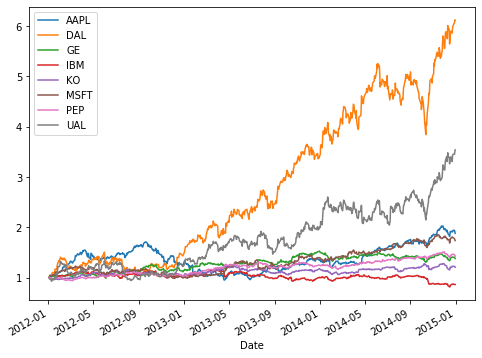

In [21]:
# строим графики накопленной доходности по всем акциям, чтобы получить представление об эффективности вложений в эти акции
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2)

-Изменение шага дискретизации временного ряда для вычисления ежемесячной доходности вместо ежедневной.

In [22]:
# изменяем шаг дискретизации временного ряда и заполняем пропущенные значения
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker           AAPL    DAL         GE  ...       MSFT  \
Date                                     ...              
2012-01-31  65.211426  10.55  17.990385  ...  29.530001   
2012-02-29  77.491432   9.81  18.317308  ...  31.740000   
2012-03-31  77.491432   9.81  18.317308  ...  31.740000   
2012-04-30  83.425713  10.96  18.826923  ...  32.020000   
2012-05-31  82.532860  12.10  18.355770  ...  29.190001   

Ticker            PEP    UAL  
Date                          
2012-01-31  65.669998  23.10  
2012-02-29  62.939999  20.65  
2012-03-31  62.939999  20.65  
2012-04-30  66.000000  21.92  
2012-05-31  67.849998  25.17  

[5 rows x 8 columns]

In [23]:
# вычисляем ежемесячные процентные изменения 
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker          AAPL       DAL        GE  ...      MSFT  \
Date                                      ...             
2012-01-31       NaN       NaN       NaN  ...       NaN   
2012-02-29  0.188311 -0.070142  0.018172  ...  0.074839   
2012-03-31  0.000000  0.000000  0.000000  ...  0.000000   
2012-04-30  0.076580  0.117227  0.027821  ...  0.008822   
2012-05-31 -0.010702  0.104015 -0.025026  ... -0.088382   

Ticker           PEP       UAL  
Date                            
2012-01-31       NaN       NaN  
2012-02-29 -0.041571 -0.106061  
2012-03-31  0.000000  0.000000  
2012-04-30  0.048618  0.061501  
2012-05-31  0.028030  0.148266  

[5 rows x 8 columns]

In [24]:
# вычисляем ежемесячную накопленую доходность
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker          AAPL       DAL        GE  ...      MSFT  \
Date                                      ...             
2012-01-31       NaN       NaN       NaN  ...       NaN   
2012-02-29  1.188311  0.929858  1.018172  ...  1.074839   
2012-03-31  1.188311  0.929858  1.018172  ...  1.074839   
2012-04-30  1.279311  1.038863  1.046499  ...  1.084321   
2012-05-31  1.265620  1.146919  1.020310  ...  0.988486   

Ticker           PEP       UAL  
Date                            
2012-01-31       NaN       NaN  
2012-02-29  0.958429  0.893939  
2012-03-31  0.958429  0.893939  
2012-04-30  1.005025  0.948918  
2012-05-31  1.033196  1.089610  

[5 rows x 8 columns]

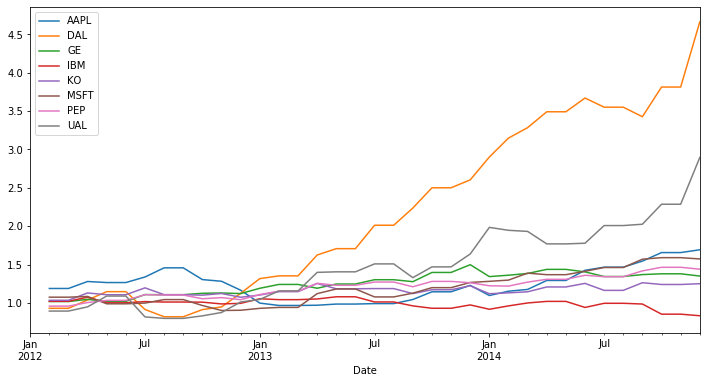

In [25]:
# строим графики ежемесячной накопленной доходности по всем акциям
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2)

-Анализ распределения доходности

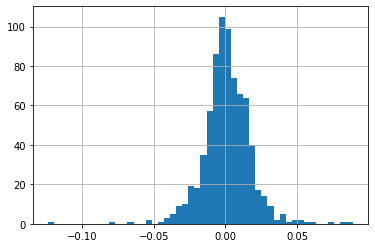

In [26]:
# гистограмма ежедневного процентного изменения для AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187C9D8EC18>,
      dtype=object)

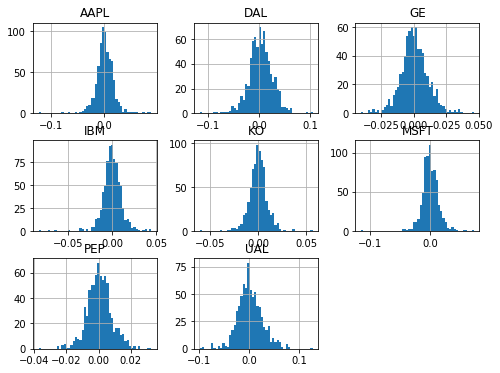

In [27]:
# матрица гистограмм ежедневных процентных изменений 
daily_pc.hist(bins=50, figsize=(8,6))

-Выполнение вычислений на основе скользящего среднего

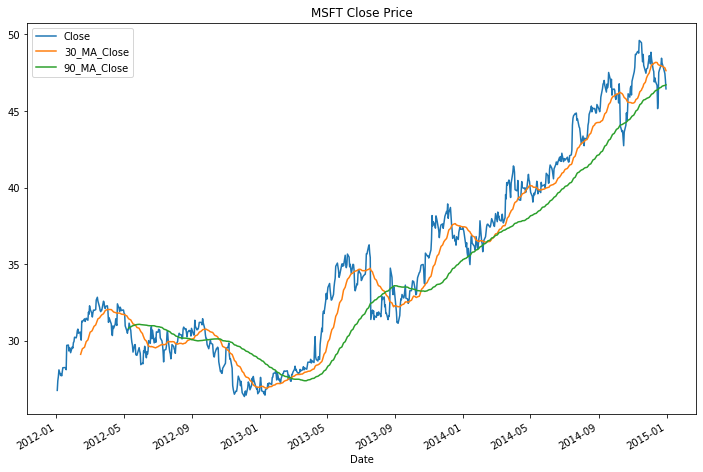

In [28]:
# извлекаем только цену из MSFT
msft_close = close_px[['MSFT']]['MSFT']
# вычисляем 30 и 90 дневные скользящие средние
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# записываем в объект DataFrame, серии которого будем визуализировать
result = pd.DataFrame({'Close': msft_close,
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# визуализируем все серии на одном и том же графике
result.plot(title='MSFT Close Price')
plt.gcf().set_size_inches(12,8)

-Сравнение средних ежедневных доходностей акций

Text(0, 0.5, 'AAPL')

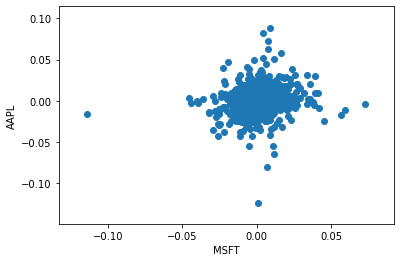

In [29]:
# визуализация взаимосвязи между ежедневным процентным изменением цены закрытия MSFT и ежедневным процентным изменением цены закрытия AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')

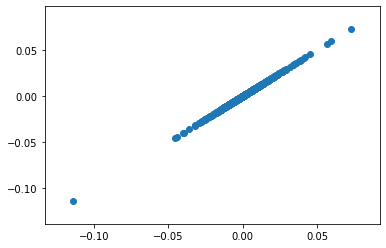

In [30]:
# демонстрируем идеальную корреляцию
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187CC6EBF28>,
      dtype=object)

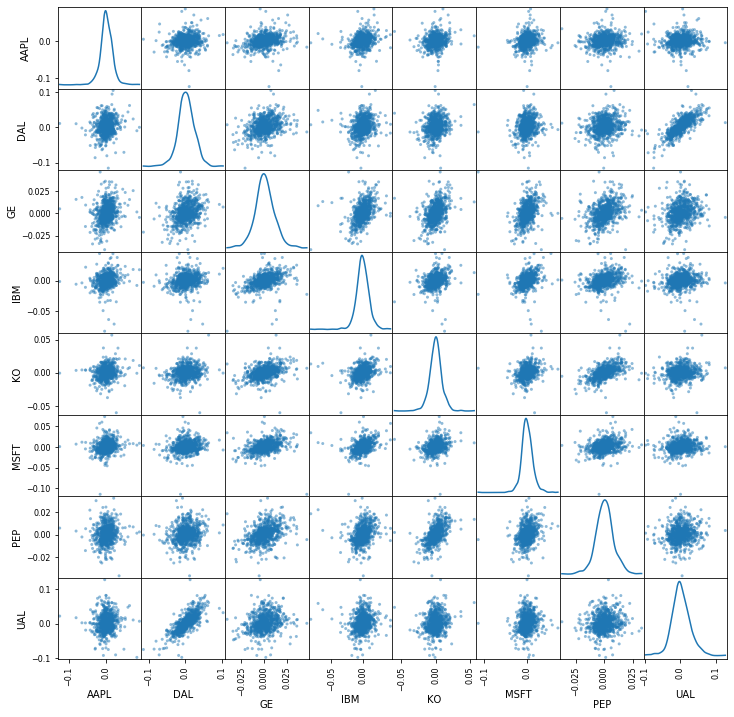

In [31]:
from pandas.plotting import scatter_matrix
# строим матрицу диаграмм рассеяния, что бы визуализировать корреляцию между всеми акцифми
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12))

-Корреляция между котировками на основе ежедневного процентного изменения цены закрытия

In [32]:
# вычисляем корреляции между котировками акций на основе ежедневного процентного изменения цены закрытия
corrs = daily_pc.corr()
corrs

Ticker      AAPL       DAL        GE  ...      MSFT  \
Ticker                                ...             
AAPL    1.000000  0.136758  0.238881  ...  0.182782   
DAL     0.136758  1.000000  0.318261  ...  0.152909   
GE      0.238881  0.318261  1.000000  ...  0.340142   
IBM     0.213496  0.166218  0.427995  ...  0.354350   
KO      0.157887  0.187431  0.386339  ...  0.267558   
MSFT    0.182782  0.152909  0.340142  ...  1.000000   
PEP     0.096902  0.174172  0.373410  ...  0.280875   
UAL     0.061735  0.761222  0.236525  ...  0.128079   

Ticker       PEP       UAL  
Ticker                      
AAPL    0.096902  0.061735  
DAL     0.174172  0.761222  
GE      0.373410  0.236525  
IBM     0.252805  0.122614  
KO      0.553574  0.139971  
MSFT    0.280875  0.128079  
PEP     1.000000  0.124301  
UAL     0.124301  1.000000  

[8 rows x 8 columns]

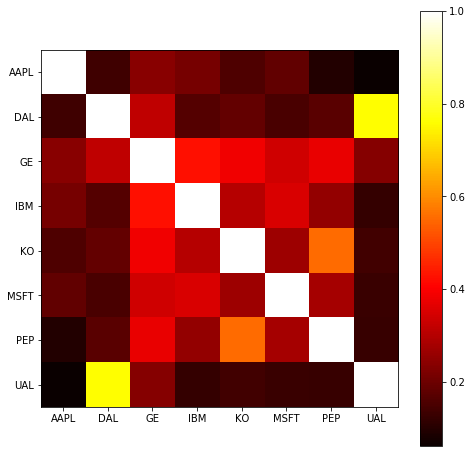

In [33]:
# строим теплокарту корреляционной матрицы
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns)
plt.yticks(range(len(corrs)),corrs.columns)
plt.gcf().set_size_inches(8,8)

-Вычисление волатильности акций

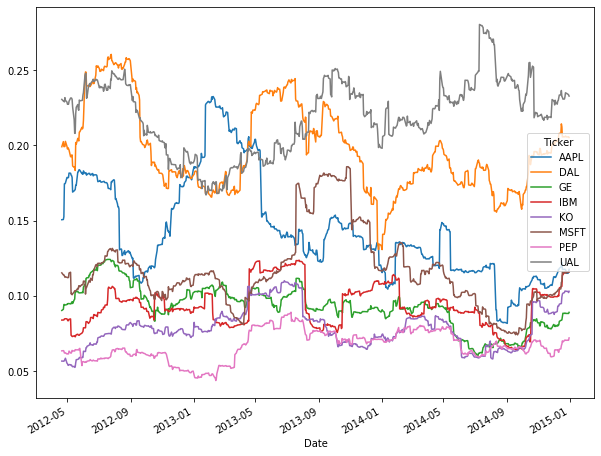

In [34]:
# минимум, состоящий из 75 периодов
min_periods = 75
# вычисляем волатильность
vol = daily_pc.rolling(window=min_periods).std()* \
        np.sqrt(min_periods)
# визуализируем ее
vol.plot(figsize=(10,8))

-Визуализация взаимосвязи между риском и ожидаемой доходностью